# Homework 2 - Least Sqaures
Make sure you have downloaded:
- housing.csv

In this assignment we will use data about the price of housing vs lot size

In [92]:
######## DO NOT CHANGE THIS CODE ##########
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")
display(df)
###########################################

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


# 1 Create training and test data
## 1.1 Get X and y
1. [1 pt] Define the following numpy arrays by choosing the correct columns of the housing dataframe:
    - $\texttt{X}$, which contains the 'lotsize' column
    - $\texttt{y}$, which contains the 'price' column
2. [1 pt] Print the shapes of $\texttt{X}$ and $\texttt{y}$.

In [93]:
# TODO extract price and lotsize columns as np arrays
X = np.array(df['lotsize'])
y = np.array(df['price'])

# TODO print the shapes of X and Y
print(X.shape, y.shape)

(546,) (546,)


## 1.2 Train-test split
1. [1 pt] Create new numpy column arrays called $\texttt{X\_train, X\_test, y\_train}$, and $\texttt{y\_test}$, where:
    - you use train_test_split() function from sklearn.model_selection
    - the training dataset contains the 80% of samples
    - the testing dataset contains the 20% of samples
    - random state set to 0.

2. [2 pt] Print the shape of the training and testing datasets. Make sure the prints are informative.

In [94]:
# TODO split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2,random_state=0)


# TODO print
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (436,)
Shape of X_test: (110,)
Shape of y_train: (436,)
Shape of y_test: (110,)


## 1.3 Scatter plot
1. [1 pt] On the same figure, make scatterplots of the training and testing data.
    - x-coordinate should be the lot size, X, and 
    - y-coordinate should be the price, Y.
2. [1 pt] Use markers with different shapes and colors to show to training and testing datasets. 
3. [1 pt] Include 
    - x axis labels, 
    - y axis labels, 
    - grid lines,
    - an approapriate title, and 
    - a legend.

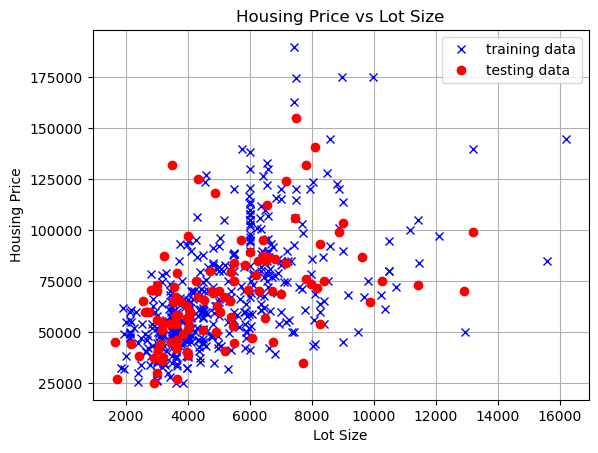

In [95]:
plt.plot(X_train, y_train, 'x', color='blue', label='training data')
plt.plot(X_test, y_test, 'o', color='red', label = 'testing data')

plt.grid(True)  # Add grid lines
plt.xlabel('Lot Size')  # Add x-axis label
plt.ylabel('Housing Price')  # Add y-axis label
plt.title('Housing Price vs Lot Size')  # Add title
plt.legend()  # Add legend


# 2 (Manual) Least Squares Linear Regression
## 2.1 Obtain coefficients
[2 pt] Without using sklearn or other packages, implement least squares linear regression to fit a line to the __training__ data using the linear model, 
    $$Y=a^T X + b,$$
    where $a$ is a vector of weight coefficients for each feature and $b$ is a scalar offset. (You should follow the implementation seen in lecture.)

Compute the fitted values for $a$ and $b$ and print them. 
- Make sure you specify in your prints, which is $a$ and which is $b$.

In [96]:
# TODO code up manual linear regression

# X is modeling our design matrix
X_design_lin = np.ones((X_train.size,2))
print(X_design_lin.shape)

# X[:,1] is the second column of X which is set to x
X_design_lin[:,1] = X_train

# Xpinv is the (X * X^T)^-1 * X^T
Xpinv = np.dot(np.linalg.inv(np.dot(X_design_lin.T, X_design_lin)), X_design_lin.T)
# bHat is Xpinv * y
print('Xpinv shape:', Xpinv.shape)
print('y_train shape:', y_train.shape)
bHat = np.dot(Xpinv, y_train.T) # y should be a column vector byt it is a row vector
# TODO compute a and b and print
b = bHat[0]
a = bHat[1]

# Print the coefficients
print("Coefficients:")
print("a:", a)
print("b:", b)


(436, 2)
Xpinv shape: (2, 436)
y_train shape: (436,)
Coefficients:
a: 7.000228875604552
b: 32139.515782094364


## 2.2 Predict
[1 pt] Use your custom fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_linear}$. Your method should involve matrix multiplications.

In [97]:
# TODO predict

# 110x2 * 2x1 = 110x1
print('X test shape:', X_test.shape)
X_design_lin_test = np.ones((X_test.size,2))
X_design_lin_test[:,1] = X_test
print('Y_test_pred_linear shape:', X_design_lin_test.shape, bHat.shape)

Y_test_pred_linear = X_design_lin_test @ bHat
print(Y_test_pred_linear.shape)

X test shape: (110,)
Y_test_pred_linear shape: (110, 2) (2,)
(110,)


# 3 (sklearn) Least Squares Linear Regression
## 3.1 Obtain coefficients
[2 pt] Use sklearn.linear_model.LinearRegression to fit a linear model to the training data. See their documentation for how to use the model.
- You may need to reshape the data to column arrays by array.reshape(-1,1).

Extract the fitted values for $a$ and $b$ and print them. Make sure you specify in your prints, which is $a$ and which is $b$.
- At this point, you should verify that the $a$ and $b$ values you obtained manually and by sklearn are basically the same.

In [98]:
from sklearn.linear_model import LinearRegression
print(X_train.shape)
print(y_train.shape)
reg = LinearRegression().fit(X_train.reshape(-1,1), y_train) # X_train should be a column vector

a = reg.coef_
b = reg.intercept_

print("Coefficients:")
print("a:", a)
print("b:", b)

(436,)
(436,)
Coefficients:
a: [7.00022888]
b: 32139.515782094364


## 3.2 Predict
[1 pt] Use your sklearn fitted model to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_sklearn}$. You should use sklearn functions/methods for this.

In [99]:
# TODO predict

Y_test_pred_sklearn = reg.predict(X_test.reshape(-1,1))
print(Y_test_pred_sklearn.shape)

(110,)


## 3.3 Verify correctness
[1 pt] Write code, with any relevant prints, to verify that $\texttt{Y\_test\_pred\_linear}$ and $\texttt{Y\_test\_pred\_sklearn}$ are the same.    
- You can use the np.allclose() function. You may need to flatten the sklearn prediction array $\texttt{Y\_test\_pred\_sklearn}$.

In [100]:
# TODO verify

# print(Y_test_pred_linear.shape)
# print(Y_test_pred_sklearn.shape)

# dont need to flatten the sklearn array since both are 1D arrays

# Check if the two arrays are close
are_close = np.allclose(Y_test_pred_linear, Y_test_pred_sklearn)

print(f"Are the predictions close? {are_close}")


Are the predictions close? True


## 3.4 Plot
[3 pt] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points, based on linear model.
3. Straight line plot of linear model, which you should base of the fitted coefficients. 

[1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Your figure must include 
- x axis labels, 
- y axis labels, 
- gridlines, 
- an approapriate title, and 
- a legend.

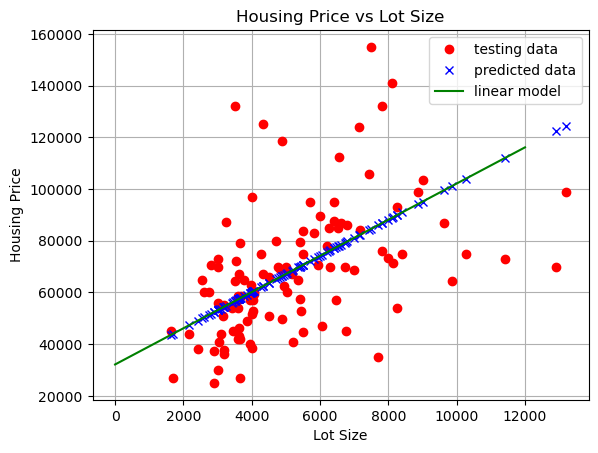

In [101]:
# TODO plot

plt.plot(X_test, y_test, 'o', color='red', label='testing data')
plt.plot(X_test, Y_test_pred_linear, 'x', color='blue', label='predicted data')
x = np.linspace(0, 12000, 1000)
y = a * x + b
plt.plot(x, y, color='green', label='linear model')
plt.xlabel('Lot Size')
plt.ylabel('Housing Price')
plt.title('Housing Price vs Lot Size')
plt.legend()
plt.grid(True)

## 3.5 Discuss TODO
[1 pt] Is the method of least squares linear regression appropriate for the housing data? Why or why not? In particular, we seek your reflection on whether the data is suitable for linear modelling.

**Ans:** Glancing at the plot for Lot Size and Price it appears the regression lines follows the trend of data, however in terms of fit it is hard to tell based on how spread out the residuals are relative to the line. Looking at the residuals plot, we can also see as the Lot Size increases, the variance in residuals appears to increase, thus the plot doesnt appear to be homoscedastic. Looking at the R squared value we have 0.1936. Based on this value we can state that approximately only 19% of the changes in the dependent variable can be explained by changes in the independent variable, however this appears to be due to the high variance in our dependent variable Price. Thus based on the pattern of variance of our residuals, it appears the the least squares linear regression doesnt appear to be an appropriate model for predicting price based on Lot Size.

R^2: 0.1935952504981272


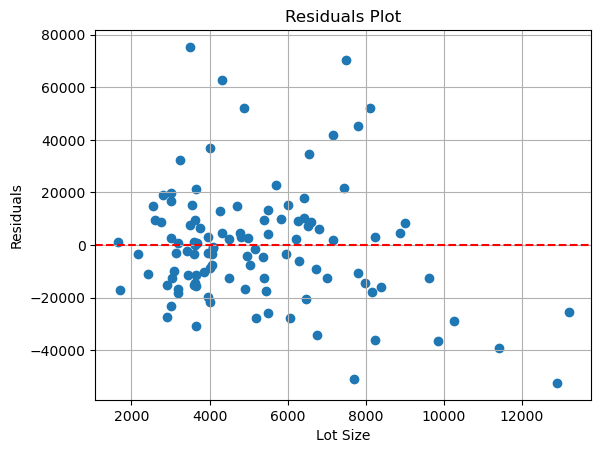

In [102]:
import numpy as np
import numpy as np

r_squared = 1 - (np.sum((y_test - Y_test_pred_linear)**2) / np.sum((y_test - np.mean(y_test))**2))
print("R^2:", r_squared)

import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - Y_test_pred_linear

# Create a residuals plot
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Lot Size')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


# 4 (Manual) Least Squares on 4th order polynomial
## 4.1 Obtain Coefficients
Now, suppose we instead used the 4th order polynomial model
$$
Y = a_4 x^4 +  a_3x^3 + \dots + a_1 x + a_0.
$$
[2 pt] Compute and print the fitted coefficients $a_0, \dots, a_4$. You must do this using the custom/manual method, not via sklearn package. 
- Print them to 12 decimal places.

In [103]:
X_design_poly = np.ones((X_train.size,5))
X_design_poly[:,1] = X_train
X_design_poly[:,2] = X_train**2
X_design_poly[:,3] = X_train**3
X_design_poly[:,4] = X_train**4

Xpinv = np.linalg.inv(X_design_poly.T @ X_design_poly) @ X_design_poly.T
bHat = Xpinv @ y_train

# Print the coefficients
print("Coefficients:")
print("a_4:", round(bHat[4], 12))
print("a_3:", round(bHat[3], 12))
print("a_2:", round(bHat[2], 12))
print("a_1:", round(bHat[1], 12))
print("a_0:", round(bHat[0], 12))





Coefficients:
a_4: 3.3e-11
a_3: -1.049992e-06
a_2: 0.010557857235
a_1: -31.715031089912
a_0: 74489.42501252274


## 4.2 Predict
[1 pt] Use your fitted coefficients to make a prediction about the $\texttt{Y\_test}$ values given $\texttt{X\_test}$ values. Name the predicted values of $\texttt{Y\_test\_pred\_poly}$. Your method should involve matrix multiplications.

In [104]:
# TODO predict
X_design_test_poly = np.ones((X_test.size,5))
X_design_test_poly[:,1] = X_test
X_design_test_poly[:,2] = X_test**2
X_design_test_poly[:,3] = X_test**3
X_design_test_poly[:,4] = X_test**4
Y_test_pred_poly = X_design_test_poly @ bHat

## 4.3 Plot
[3 pt] On the same figure (x-coordinate is lot size. y-coordinate is price), make the following plots:
1. Scatter plot of true test data.
2. Scatter plot of prediction on test points, based on polynomial model.
3. Curved line plot of polynomial model, which are based off the fitted coefficients. 

[1 pt] Use point markers with different shapes and colors to show to testing data and prediction. Your figure must include 
- x axis labels, 
- y axis labels, 
- gridlines, 
- an approapriate title, and 
- a legend.

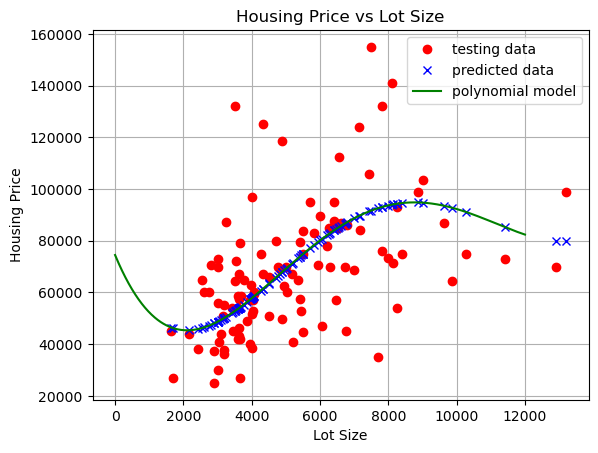

In [105]:
# TODO plot
plt.plot(X_test, y_test, 'o', color='red', label='testing data')
plt.plot(X_test, Y_test_pred_poly, 'x', color='blue', label='predicted data')
x = np.linspace(0, 12000, 1000)
y = bHat[4] * x**4 + bHat[3] * x**3 + bHat[2] * x**2 + bHat[1] * x + bHat[0]
plt.plot(x, y, color='green', label='polynomial model')
plt.xlabel('Lot Size')
plt.ylabel('Housing Price')
plt.title('Housing Price vs Lot Size')
plt.legend()
plt.grid(True)

## 4.4 Compare linear (1st order) and polynomial (4th order)
1. [1 pt] Compute the residual sum of squares (RSS) on the test points of both:
- 1st order model, $\texttt{rss\_linear}$
- 4th order model, $\texttt{rss\_poly}$

(The residual is "the actual values of $\texttt{Y}$" minus "predicted values from the linear model." RSS is the sum of (squares of residual); this is just a (nonnegative) scalar value that gives one way to measure performance of the models.)

2. [1 pt] Print $\texttt{rss\_linear}$ and $\texttt{rss\_poly}$.

In [106]:
# TODO compute RSS
residual_linear = y_test - Y_test_pred_linear
rss_linear = np.sum(residual_linear**2)

residual_poly = y_test - Y_test_pred_poly
rss_poly = np.sum(residual_poly**2)

# TODO print RSS
print("RSS for linear model:", rss_linear)
print("RSS for polynomial model:", rss_poly)

percent = (rss_linear - rss_poly) / rss_linear * 100
print(f"Polynomial model reduces RSS by {percent:.2f}%")

RSS for linear model: 55591831378.39376
RSS for polynomial model: 50853240555.053444
Polynomial model reduces RSS by 8.52%


3. [1 pt] Which RSS is smaller? Does it necessarily mean that the model with smaller RSS is always "better"? Why or why not?

    **Ans:** The RSS for polynomial model is slightly lower, reducing the rss for the linear model by 8.52%. This indicates that for the polynomial model, the predicted values are closer to the polynomal model than for the linear model. This doesn't necessarily mean the model is better because of the trade off between bias and variance when using a model against testing data. For instance, a model with small RSS on the training data might have low bias but high variance when generalizing to testing data. In other words some bias helps the model fit better when there is new testing data since the training data might not completely describe all possible data point values. This can also be said for models with a high RSS when predicting data on a test set since the model on the training data is not trying to capture the noise in the training data.